### Project title: An analysis of paleo-present climate data

##### Project 2 for Programming for Data Analysis. Semester 2, HDip in Data Analytics at ATU, Galway 2023/24 
##### Author: Shane Keenan 
##### status: ongoing 
##### Submission due date: 22/12/2023

---


Project statement (from lecturer Brain McGinley)


- Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
- Examine Irish context:
o Climate change signals: (see Maynooth study: The emergence of a climate change 
signal in long-term Irish meteorological observations - ScienceDirect)
- Fuse and analyse data from various data sources and format fused data set as a pandas 
dataframe and export to csv and json formats
- For all of the above variables, analyse the data, the trends and the relationships between 
them (temporal leads/lags/frequency analysis).
- Predict global temperature anomaly over next few decades (synthesise data) and compare to 
published climate models if atmospheric CO2 trends continue
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)


### References

[1] 

[2]
 
[3]



In [1]:
import os

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.dates as mdates 
from matplotlib.ticker import MultipleLocator
import math as m
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# read in excel spredsheet 
# https://datatofish.com/read_excel/
# https://www.geeksforgeeks.org/how-to-import-an-excel-file-into-python-using-pandas/
# https://www.datacamp.com/tutorial/python-excel-tutorial


# Syntax: pandas.read_excel(io, sheet_name=0, header=0, names=None,….)


### data from Luthi et al Nature paper

Lüthi, D., Le Floch, M., Bereiter, B. et al. High-resolution carbon dioxide concentration record 650,000–800,000 years before present. Nature 453, 379–382 (2008). https://doi.org/10.1038/nature06949



atmospheric carbon dioxide concentrations can be determined by measuring the composition of air trapped in ice cores from Antarctica.

BP - Before Present 

METHODS SUMMARY
The analytical methods for routine CO2 measurements used at the University of
Bern and at LGGE in Grenoble are based on dry extraction techniques followed
by laser absorption spectroscopy and gas chromatography, respectively. In Bern,
four to six samples (23 3 23 3 16 mm; 8 g) from each depth level (every 550 mm)
in the ice core are measured in random order (two on the same day; the following
two after all depth intervals have been measured twice). The samples are crushed
by a cooled needle cracker under vacuum conditions. The sample container is
connected to a cold trap for several minutes to release the air from the clathrates.
Afterwards, the air is expanded to a measuring cell, where a laser is tuned six
times over the absorption line of a vibration–rotation transition of the CO2
molecule. The calibration is done using a CO2 in air standard gas
(251.65 p.p.m.v.) scaled on the World Meteorological Organization mole fraction scale.
In Grenoble, on every depth level one to three samples of about 40 g of ice are
crushed under vacuum conditions. About 20 min later, the extracted gas is
expanded in the sample loop of the gas chromatograph and analysed.
Depending on the amount of the extracted air, three to five successive analyses
are done. To avoid the possible influence of the water vapour injected with the
gas, the CO2 ratio is calculated as the ratio between the CO2 peak and the air
(O2 1 N2) peak. The calibration is done using an Air Liquide standard scaled on
three CSIRO standards (260.3 p.p.m.v., 321.1 p.p.m.v. and 172.8 p.p.m.v.).

In [3]:
# header data for file
# Dome C (611-800 kyr BP)				
# Lüthi et al. (sub)
# University of Bern				LGGE in Grenoble

# how to use relative path 
#https://stackoverflow.com/questions/1270951/how-to-refer-to-relative-paths-of-resources-when-working-with-a-code-repository
current_directory = os.getcwd()
# relative path from the notebook to the Excel file
relative_path = "data\\project2\\41586_2008_BFnature06949_MOESM31_ESM.xls"
# Join the two 
file_path = os.path.join(current_directory, relative_path)
df = pd.read_excel(file_path, sheet_name="1.  new CO2 data", header = 6)

In [4]:
df.head(2)

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1
0,3026.58,611269,257.8,2.1,3061.71,667435.0,178.5
1,3030.97,616164,252.6,0.6,3063.98,670124.0,189.0


In [5]:
df.describe()

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1
count,247.000000,247.000000,247.000000,247.000000,47.000000,47.000000,47.00000
mean,3123.501134,723999.655870,216.088664,1.248178,3148.893617,750698.170213,222.33617
std,40.589369,41319.636469,20.259783,0.614713,35.427754,36597.113508,20.93293
min,3026.580000,611269.000000,171.600000,0.200000,3061.710000,667435.000000,178.50000
25%,3089.115000,690175.500000,203.950000,0.800000,3130.880000,729879.000000,208.15000
50%,3125.530000,723464.000000,218.400000,1.100000,3160.580000,760338.000000,224.20000
75%,3159.535000,759094.500000,231.850000,1.600000,3174.330000,778397.500000,238.95000
max,3190.080000,798512.000000,260.300000,3.700000,3190.280000,798893.000000,256.60000


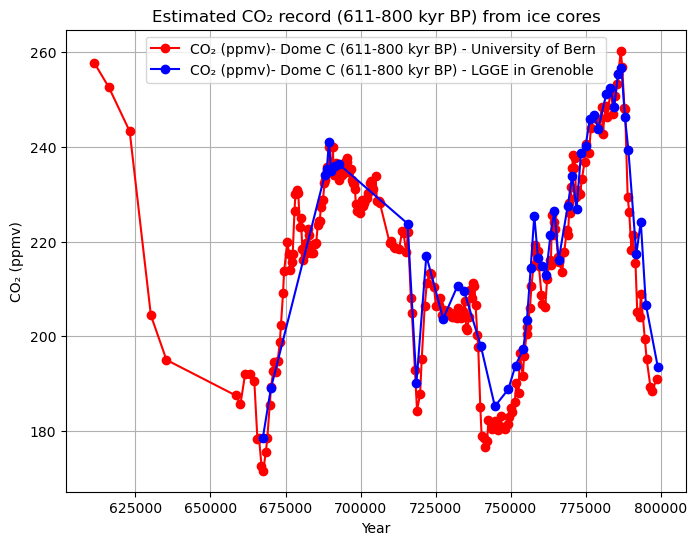

In [6]:
#https://www.geeksforgeeks.org/how-to-print-superscript-and-subscript-in-python/

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df['EDC3_gas_a (yr)'], df['CO2 (ppmv)'], color='red', label='CO\u2082 (ppmv)- Dome C (611-800 kyr BP) - University of Bern ', marker = 'o')
plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='CO\u2082 (ppmv)- Dome C (611-800 kyr BP) - LGGE in Grenoble',marker = 'o')
plt.xlabel('Year')
plt.ylabel('CO\u2082 (ppmv)')
plt.title('Estimated CO\u2082 record (611-800 kyr BP) from ice cores')
plt.legend(loc="upper center")
plt.grid(True)
plt.show()

Import the second tab of data in excel spreadsheet 

In [7]:
df2 = pd.read_excel(file_path, sheet_name="2.  Vostok-TD-Dome C", header = 6)

In [8]:
df2.head(2)

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1,Depth (m).2,tentatively synchronized on EDC3_gas_a (yr),CO2 (ppmv).2,...,Depth (m).4,EDC3_gas_a (yr).3,CO2 (ppmv).4,Depth (m).5,EDC3_gas_a (yr).4,CO2 (ppmv).5,sigma (ppmv).3,Depth (m).6,EDC3_gas_a (yr).5,CO2 (ppmv).6
0,102.83,137.0,280.4,1.8,149.1,2690,284.7,380.82,18906.0,190.5,...,2700.77,392544.0,259.5,3026.58,611269.0,257.8,2.1,3061.71,667435.0,178.5
1,106.89,268.0,274.9,0.7,173.1,3897,272.7,382.42,23379.0,189.1,...,2702.97,393579.0,273.6,3030.97,616164.0,252.6,0.6,3063.98,670124.0,189.0


In [9]:
df2.describe()

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1,Depth (m).2,tentatively synchronized on EDC3_gas_a (yr),CO2 (ppmv).2,...,Depth (m).4,EDC3_gas_a (yr).3,CO2 (ppmv).4,Depth (m).5,EDC3_gas_a (yr).4,CO2 (ppmv).5,sigma (ppmv).3,Depth (m).6,EDC3_gas_a (yr).5,CO2 (ppmv).6
count,183.000000,183.000000,183.000000,183.000000,372.000000,372.000000,372.000000,73.000000,73.000000,73.000000,...,31.000000,31.000000,31.000000,247.000000,247.000000,247.000000,247.000000,47.000000,47.000000,47.00000
mean,343.298087,9228.300546,250.746448,0.781421,2426.357688,223697.233871,232.977957,425.546438,41841.000000,204.697260,...,2747.750645,410719.483871,274.022581,3123.501134,723999.655870,216.088664,1.248178,3148.893617,750698.170213,222.33617
std,138.211257,5807.688580,29.107377,0.352673,787.349600,108534.134791,29.047443,27.394757,10308.518356,7.958678,...,24.854797,9918.306058,7.970350,40.589369,41319.636469,20.259783,0.614713,35.427754,36597.113508,20.93293
min,102.830000,137.000000,184.400000,0.100000,149.100000,2690.000000,182.200000,380.820000,18906.000000,187.700000,...,2700.770000,392544.000000,254.100000,3026.580000,611269.000000,171.600000,0.200000,3061.710000,667435.000000,178.50000
25%,224.100000,4427.000000,238.450000,0.500000,1967.350000,133949.000000,206.600000,398.610000,33913.000000,199.100000,...,2729.370000,403456.000000,271.250000,3089.115000,690175.500000,203.950000,0.800000,3130.880000,729879.000000,208.15000
50%,349.750000,8869.000000,262.300000,0.700000,2680.010000,221384.500000,231.950000,427.060000,40990.000000,203.600000,...,2749.170000,410206.000000,275.200000,3125.530000,723464.000000,218.400000,1.100000,3160.580000,760338.000000,224.20000
75%,452.615000,12851.000000,270.900000,1.000000,3034.260000,312070.000000,256.800000,449.240000,47916.000000,211.300000,...,2767.870000,418496.000000,278.650000,3159.535000,759094.500000,231.850000,1.600000,3174.330000,778397.500000,238.95000
max,578.110000,22015.000000,282.200000,2.000000,3349.510000,438986.000000,298.600000,470.920000,63205.000000,220.400000,...,2784.370000,426953.000000,285.600000,3190.080000,798512.000000,260.300000,3.700000,3190.280000,798893.000000,256.60000


Plot each data set individually on the same plot. 

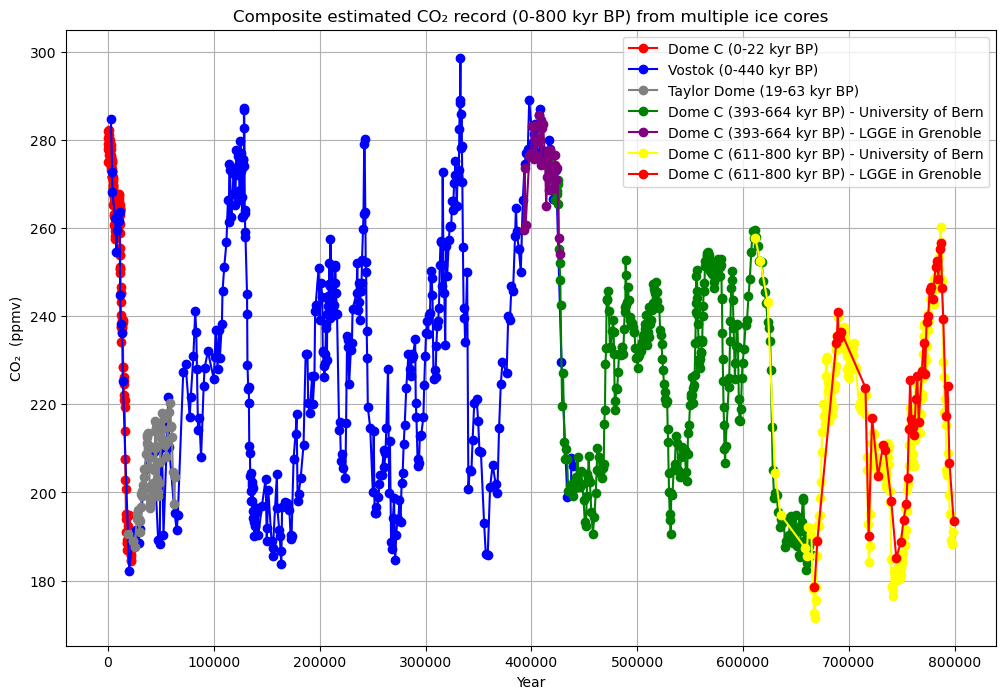

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(df2['EDC3_gas_a (yr)'], df2['CO2 (ppmv)'], color='red', label='Dome C (0-22 kyr BP)', marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).1'], df2['CO2 (ppmv).1'], color='Blue', label='Vostok (0-440 kyr BP)',marker = 'o')
plt.plot(df2['tentatively synchronized on EDC3_gas_a (yr)'], df2['CO2 (ppmv).2'], color='grey', label='Taylor Dome (19-63 kyr BP)',marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).2'], df2['CO2 (ppmv).3'], color='green', label='Dome C (393-664 kyr BP) - University of Bern',marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).3'], df2['CO2 (ppmv).4'], color='purple', label='Dome C (393-664 kyr BP) - LGGE in Grenoble',marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).4'], df2['CO2 (ppmv).5'], color='yellow', label='Dome C (611-800 kyr BP) - University of Bern',marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).5'], df2['CO2 (ppmv).6'], color='red', label='Dome C (611-800 kyr BP) - LGGE in Grenoble',marker = 'o')

plt.xlabel('Year')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple ice cores')
plt.legend(loc="upper right")
plt.grid(True)

Import the composite data set from tab 3 of excel spreadsheet

In [11]:
# Header 
# Composite CO2 record (0-800 kyr BP)	
# 0-22 kyr BP:	Dome C (Monnin et al. 2001) measured at University of Bern
# 22-393 kyr BP:	Vostok (Petit et al. 1999; Pepin et al. 2001; Raynaud et al. 2005) measured at LGGE in Grenoble
# 393-416 kyr BP:	Dome C (Siegenthaler et al. 2005) measured at LGGE in Grenoble
# 416-664 kyr BP:	Dome C (Siegenthaler et al. 2005)  measured at University of Bern
# 664-800 kyr BP:	Dome C (Luethi et al. (sub)) measured at University of Bern
df_COM = pd.read_excel(file_path, sheet_name="3.  Composite CO2", header = 6)
df_COM.head(2)

,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9


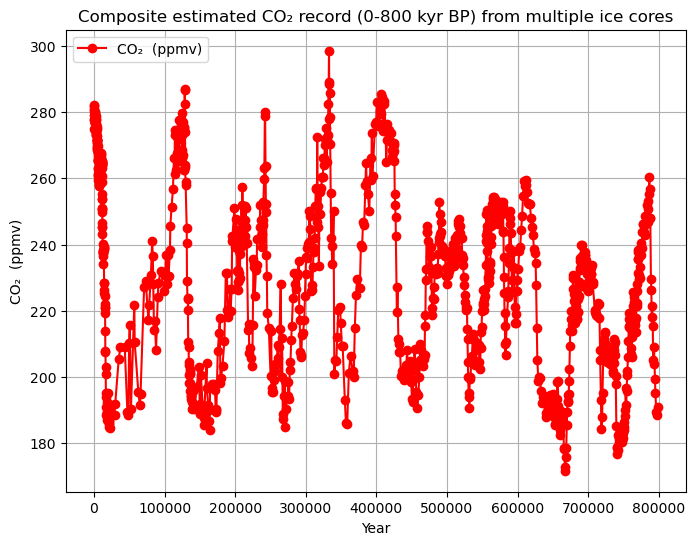

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='red', label='CO\u2082  (ppmv)', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple ice cores')
plt.legend(loc="upper left")
plt.grid(True)

### Import CO2 data from IPCC Report

[4]  https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter01_SM.pdf

In [13]:
# Composite CO2 record (0-800 kyr BP)	
# -51-1800 yr BP:'	Law Dome (Rubino et al., 2013)
# 1.8-2 kyr BP:	Law Dome (MacFarling Meure et al., 2006)
# 2-11 kyr BP:	Dome C (Monnin et al., 2001 + 2004)
# 11-22 kyr BP:	WAIS (Marcott et al., 2014) minus 4 ppmv (see text)
# 22-40 kyr BP:	Siple Dome (Ahn et al., 2014)
# 40-60 kyr BP:	TALDICE (Bereiter et al., 2012)
# 60-115 kyr BP:	EDML (Bereiter et al., 2012)
# 105-155 kyr BP:	Dome C Sublimation (Schneider et al., 2013)
# 155-393 kyr BP:	Vostok (Petit et al., 1999)
# 393-611 kyr BP:	Dome C (Siegenthaler et al., 2005)
# 612-800 kyr BP:	Dome C (Bereiter et al., 2014)
# Gasage: AICC2012 (Bazin et al., 2013) except for Law Dome, WAIS and Siple Dome (see text for more details).	
# Sigma: Where no individual sigma is given, we use average for system/record.	
relative_path2 = "data\\project2\\grl52461-sup-0003-supplementary.xls"
# Join the two 
file_path = os.path.join(current_directory, relative_path2)
df_IPCC = pd.read_excel(file_path, sheet_name="CO2 Composite", header = 14)

There was something strange going on with the column headings in this data set. Kept causing error when plotting. I think there was extra characters. Use .str.strip() to remove. 

In [14]:
df_IPCC.columns = df_IPCC.columns.str.strip()
df_IPCC.columns

Index(['Gasage (yr BP)', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')

Plot the IPCC data set 

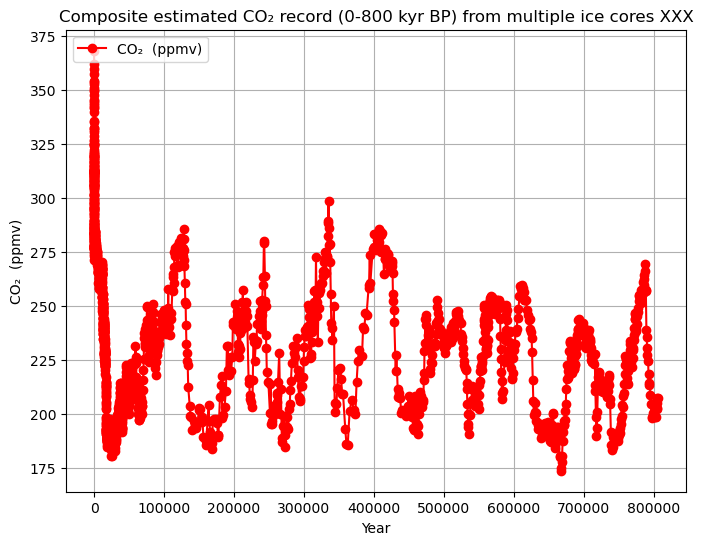

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='red', label='CO\u2082  (ppmv)', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple ice cores XXX')
plt.legend(loc="upper left")
plt.grid(True)

Compare the IPCC data set with the data presented in Luthi et al Nature paper. 

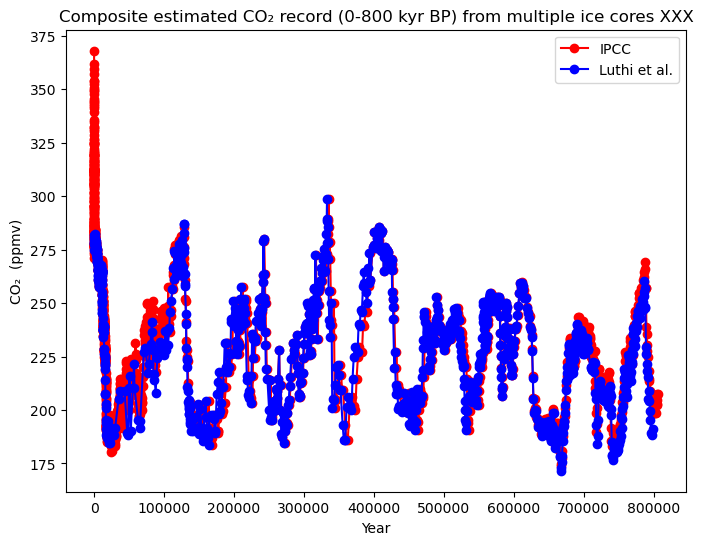

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='red', label='IPCC', marker = 'o')
plt.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='Luthi et al.', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple ice cores XXX')
plt.legend(loc="upper right")
plt.show()


### Temperature Data from Jouzel - epicaDC.deuttemp.EDC3-AICC 

In [17]:
relative_path3 = "data\\project2\\epicaDC.deuttemp.EDC3-AICC.xls"
# Join the two 
file_path3 = os.path.join(current_directory, relative_path3)
df_temp1 = pd.read_excel(file_path3, sheet_name="epicaDC.deuttemp.EDC3-AICC.txt", header = 0)
df_temp1.head(2)

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805


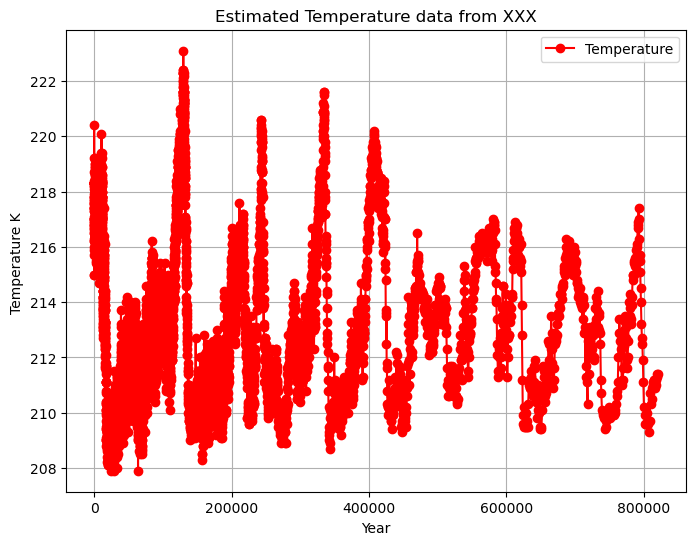

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_temp1['EDC3béta'], df_temp1['temp'], color='red', label='Temperature', marker = 'o')
#plt.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='Luthi et al.', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('Temperature K ')
plt.title('Estimated Temperature data from XXX')
plt.legend(loc="upper right")
plt.grid(2)

PLot Jouzel temperature data against the composite data from Luthi et al. 
|

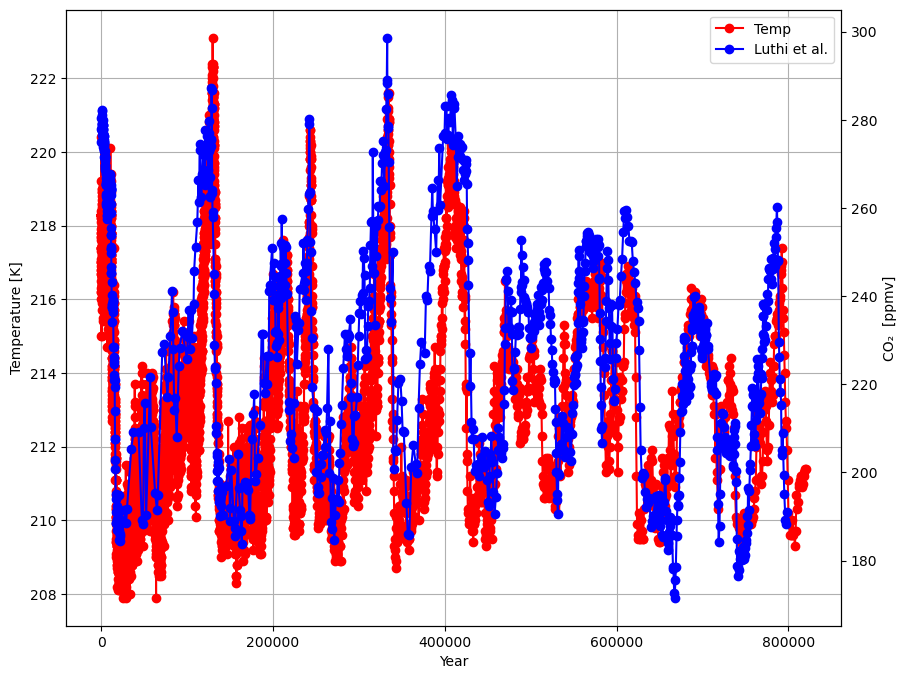

In [19]:
#all labels on one legend:  https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
# arguement for fig.add_subplot: https://stackoverflow.com/questions/3584805/what-does-the-argument-mean-in-fig-add-subplot111


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp1['EDC3béta'], df_temp1['temp'], color='red', label='Temp', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [K]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='Luthi et al.', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper right')
ax2.set_xlabel('EDC3_gas_a [yr]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax.grid(True) 
#ax2.title('Total Population Estimates (Persons 15 and over) 1950 - 2023')
#ax2.legend(loc=1)
#ax2.show()

Temperature Data from NOAA 

filename edc3deuttemp2007.txt - changed to NOAA.csv 

this is the same data as reported by Jouzel et al. however the temperature estimates have been updated.. 
 


text file header..

EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates
-----------------------------------------------------------------------
               World Data Center for Paleoclimatology, Boulder
                                  and
                     NOAA Paleoclimatology Program
-----------------------------------------------------------------------
NOTE: PLEASE CITE CONTRIBUTORS WHEN USING THIS DATA!!!!!


NAME OF DATA SET: 
EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates

LAST UPDATE: 11/26/2007 (Replaced age model. This file now includes EDC3 
age model.  Previous version of this file dated 10/16/2007 erroneously 
included the older EDC1-EDC2 age model)

CONTRIBUTOR: Valérie Masson-Delmotte, LSCE/IPSL 
IGBP PAGES/WDCA CONTRIBUTION SERIES NUMBER: 2007-091

SUGGESTED DATA CITATION: Jouzel, J., et al.  2007.
EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates. 
IGBP PAGES/World Data Center for Paleoclimatology 
Data Contribution Series # 2007-091.
NOAA/NCDC Paleoclimatology Program, Boulder CO, USA.


ORIGINAL REFERENCE:
Jouzel, J., V. Masson-Delmotte, O. Cattani, G. Dreyfus, S. Falourd, 
G. Hoffmann, B. Minster, J. Nouet, J.M. Barnola, J. Chappellaz, H. Fischer,
J.C. Gallet, S. Johnsen, M. Leuenberger, L. Loulergue, D. Luethi, H. Oerter,
F. Parrenin, G. Raisbeck, D. Raynaud, A. Schilt, J. Schwander, E. Selmo, 
R. Souchez, R. Spahni, B. Stauffer, J.P. Steffensen, B. Stenni, T.F. Stocker, 
J.L. Tison, M. Werner, and E.W. Wolff.  2007.
Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years.
Science, Vol. 317, No. 5839, pp.793-797, 10 August 2007.

ABSTRACT:
A high-resolution deuterium profile is now available along the entire 
European Project for Ice Coring in Antarctica Dome C ice core, extending 
this climate record back to marine isotope stage 20.2, ~800,000 years ago. 
Experiments performed with an atmospheric general circulation model 
including water isotopes support its temperature interpretation. 
We assessed the general correspondence between Dansgaard-Oeschger 
events and their smoothed Antarctic counterparts for this Dome C record, 
which reveals the presence of such features with similar amplitudes 
during previous glacial periods. We suggest that the interplay between 
obliquity and precession accounts for the variable intensity of 
interglacial periods in ice core records.


GEOGRAPHIC REGION: Antarctica
PERIOD OF RECORD:  803 KYrBP - present

FUNDING SOURCES: 
EPICA is funded by the EU and by national contributions from Belgium, 
Denmark, France, Germany, Italy, The Netherlands, Norway, Sweden, 
Switzerland, and the UK.  This work has in particular benefited from 
the support of EPICA-MIS of the European 6th framework and Agence 
Nationale de la Recherche (ANR), Integration des Constraintes
Paléoclimatiques pour Réduire les Incertitudes sur l’Evolution du 
Clìmat pendant les Périodes Chaudes (PICC). The main logistic support 
was provided by Institut Polaire Français Paul-Emile Victor and
Programma Nazionale Ricerche in Antartide (at Dome C)and 
Alfred Wegener Institute (at Dronning Maud Land).


DESCRIPTION:  
High-resolution (55cm.) deuterium (dDice) profile from the EPICA Dome C Ice Core, 
Antarctica (75º 06' S, 123º 21' E), with an optimal accuracy of ± 0.5 ‰ (1 sigma), 
from the surface down to 3259.7 m.




DATA:
EPICA Dome C bag deuterium data 
(LSCE, analytical accuracy of 0.5 per mille)

Temperature estimated after correction for sea-water 
isotopic composition (Bintanja et al, 2005)
and for ice sheet elevation (Parrenin et al, 2007) 
on EDC3 age scale (Parrenin et al, 2007)


Column 1: Bag number (55 cm sample)
Column 2: Top depth (m)
Column 3: EDC3 age scale (years before year 1950)
Column 4: dD data (per mille with respect to SMOW)
Column 5: Temperature estimate (temperature difference from the average of the last 1000 years)

In [20]:
relative_path4 = "data\\project2\\NOAA.csv"
# Join the two 
file_path4 = os.path.join(current_directory, relative_path4)
df_temp2 = pd.read_csv(file_path4)
df_temp2.head(2)

,Bag,ztop,Age,Deuterium,Temperature
0,1.0,0.00,-50.00000,NaN,NaN
1,2.0,0.55,-43.54769,NaN,NaN


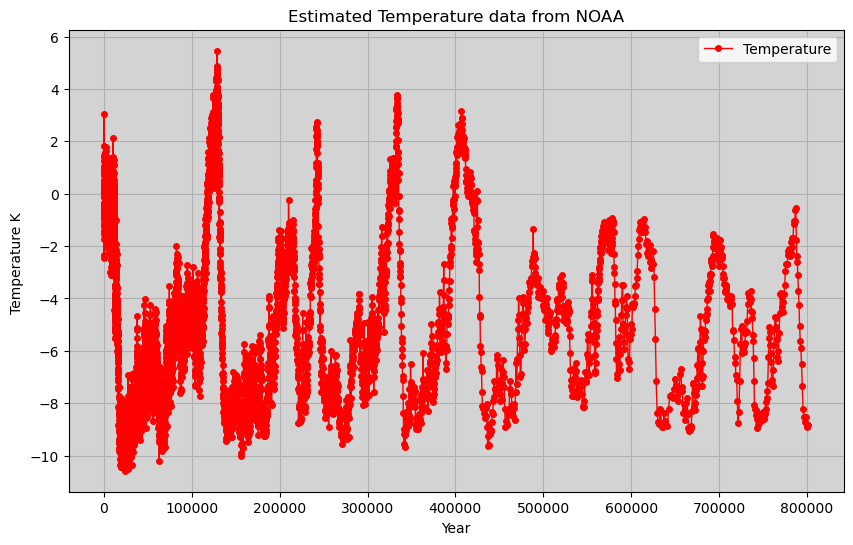

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature', marker = 'o', markersize=4, linewidth=1,)
#plt.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='Luthi et al.', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.gca().set_facecolor('lightgray')
plt.ylabel('Temperature K ')
plt.title('Estimated Temperature data from NOAA')
plt.legend(loc="upper right")
plt.grid(2)

Compare the updated temperature from NOAA with the CO2 data from Luthi et al

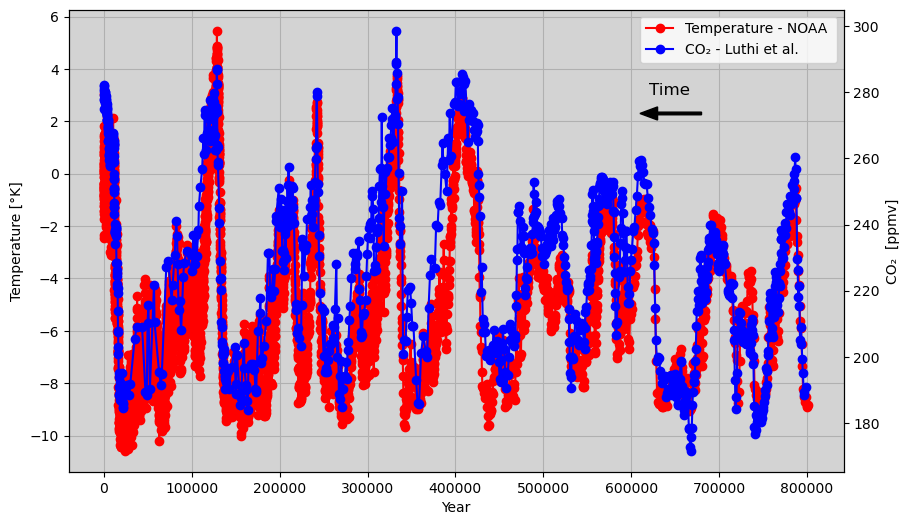

In [91]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature - NOAA ', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [\u00B0K]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='CO\u2082 - Luthi et al.', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper right')
ax.set_facecolor('lightgray')
ax2.set_xlabel('EDC3_gas_a [year]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax.grid(True) 
#arrow_properties = dict(facecolor='black', edgecolor='black', arrowstyle='->', shrinkA=0, shrinkB=0)
ax.annotate('Time ', xy=(620000,3), fontsize=12,)
ax.arrow(680000, 2.3, -50000, 0, color = 'black', width = 0.1, head_length = 20000, head_width = 0.5)

Lets looks at the different periods a bit closer 

(400000.0, 800000.0)

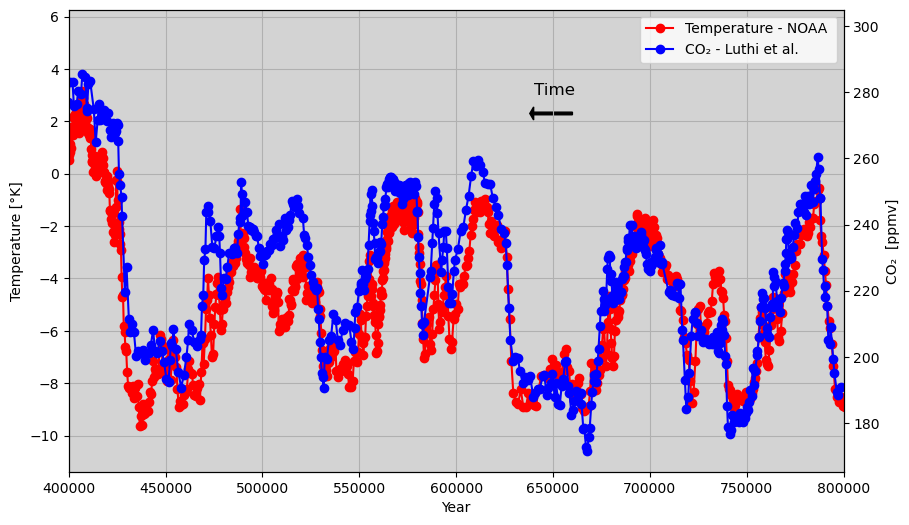

In [106]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature - NOAA ', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [\u00B0K]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='CO\u2082 - Luthi et al.', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper right')
ax.set_facecolor('lightgray')
ax2.set_xlabel('EDC3_gas_a [year]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax.grid(True) 
#arrow_properties = dict(facecolor='black', edgecolor='black', arrowstyle='->', shrinkA=0, shrinkB=0)
ax.annotate('Time ', xy=(640000,3), fontsize=12,)
ax.arrow(660000, 2.3, -20000, 0, color = 'black', width = 0.1, head_length = 2000, head_width = 0.5)
ax.set_xlim(400000, 800000)




(-1000.0, 400000.0)

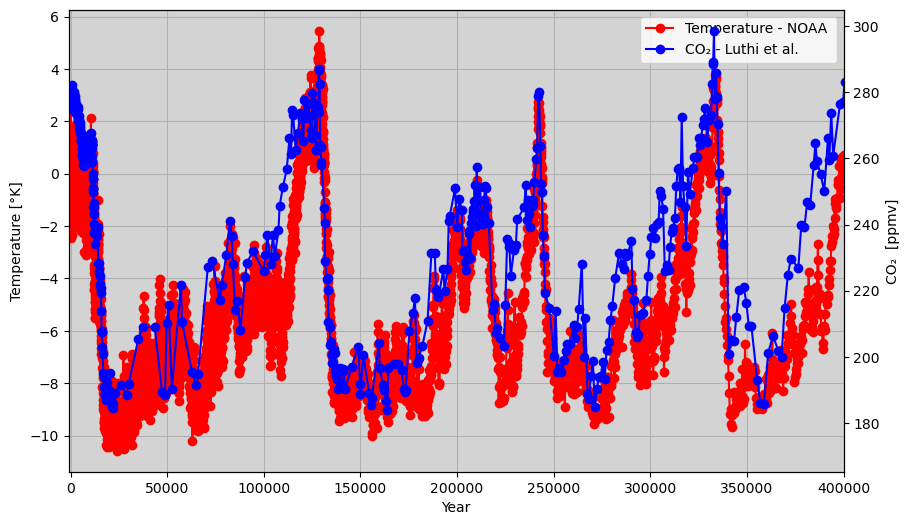

In [108]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature - NOAA ', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [\u00B0K]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='CO\u2082 - Luthi et al.', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper right')
ax.set_facecolor('lightgray')
ax2.set_xlabel('EDC3_gas_a [year]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax.grid(True) 
#arrow_properties = dict(facecolor='black', edgecolor='black', arrowstyle='->', shrinkA=0, shrinkB=0)
ax.annotate('Time ', xy=(640000,3), fontsize=12,)
ax.arrow(660000, 2.3, -20000, 0, color = 'black', width = 0.1, head_length = 2000, head_width = 0.5)
ax.set_xlim(-1000, 400000)


OK now we have the estimated CO2 and the estimated differential temperature for the past 800 kyr. However,
the sampling interval for the two data sets is very different. I guess its not possible to measure the CO2 composition and the estimate temperature on the same sample. that would be more useful.

the temperature dataset has 5800 data points for the past 800000 yrs. 
the CO2 data has 1096 data points for the past 800000 yrs.


In [23]:
df_temp2

df_temp2['delta'] = df_temp2['Age'].diff()
df_temp2


,Bag,ztop,Age,Deuterium,Temperature,delta
0,1.0,0.00,-50.00000,NaN,NaN,NaN
1,2.0,0.55,-43.54769,NaN,NaN,6.45231
2,3.0,1.10,-37.41829,NaN,NaN,6.12940
3,4.0,1.65,-31.61153,NaN,NaN,5.80676
4,5.0,2.20,-24.51395,NaN,NaN,7.09758
...,...,...,...,...,...,...
5795,NaN,3187.25,797408.00000,-440.20,-8.73,959.00000
5796,NaN,3187.80,798443.00000,-439.00,-8.54,1035.00000
5797,NaN,3188.35,799501.00000,-441.10,-8.88,1058.00000
5798,NaN,3188.90,800589.00000,-441.42,-8.92,1088.00000


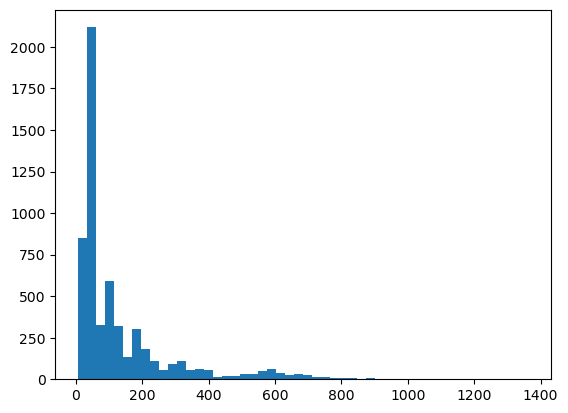

In [24]:
plt.hist(df_temp2['delta'], bins = 50)
plt.show()


In [25]:
df_COM['EDC3_gas_a (yr)']

0          137
1          268
2          279
3          395
4          404
         ...  
1091    794608
1092    795202
1093    796467
1094    797099
1095    798512
Name: EDC3_gas_a (yr), Length: 1096, dtype: int64

In [26]:
# Calculate time differences
df_COM['delta'] = df_COM['EDC3_gas_a (yr)'].diff()

df_COM

,EDC3_gas_a (yr),CO2 (ppmv),delta
0,137,280.4,NaN
1,268,274.9,131.0
2,279,277.9,11.0
3,395,279.1,116.0
4,404,281.9,9.0
...,...,...,...
1091,794608,199.4,1348.0
1092,795202,195.2,594.0
1093,796467,189.3,1265.0
1094,797099,188.4,632.0


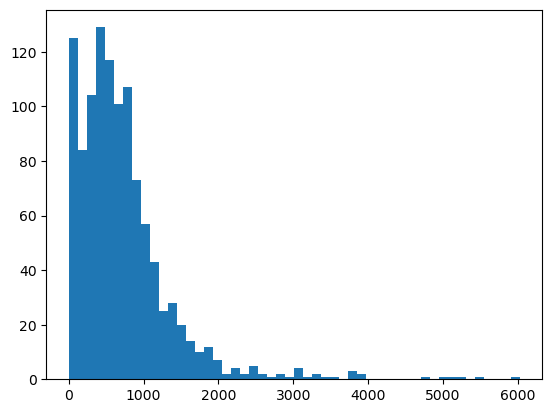

In [27]:
plt.hist(df_COM['delta'], bins = 50)
plt.show()

In [ ]:


# add trend lines to the data sets..


coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

In [28]:
df_COM_interpolated = df_COM.reindex(df_temp2.index).interpolate(method='linear')
df_COM_interpolated


,EDC3_gas_a (yr),CO2 (ppmv),delta
0,137.0,280.4,NaN
1,268.0,274.9,131.0
2,279.0,277.9,11.0
3,395.0,279.1,116.0
4,404.0,281.9,9.0
...,...,...,...
5795,798512.0,191.0,1413.0
5796,798512.0,191.0,1413.0
5797,798512.0,191.0,1413.0
5798,798512.0,191.0,1413.0


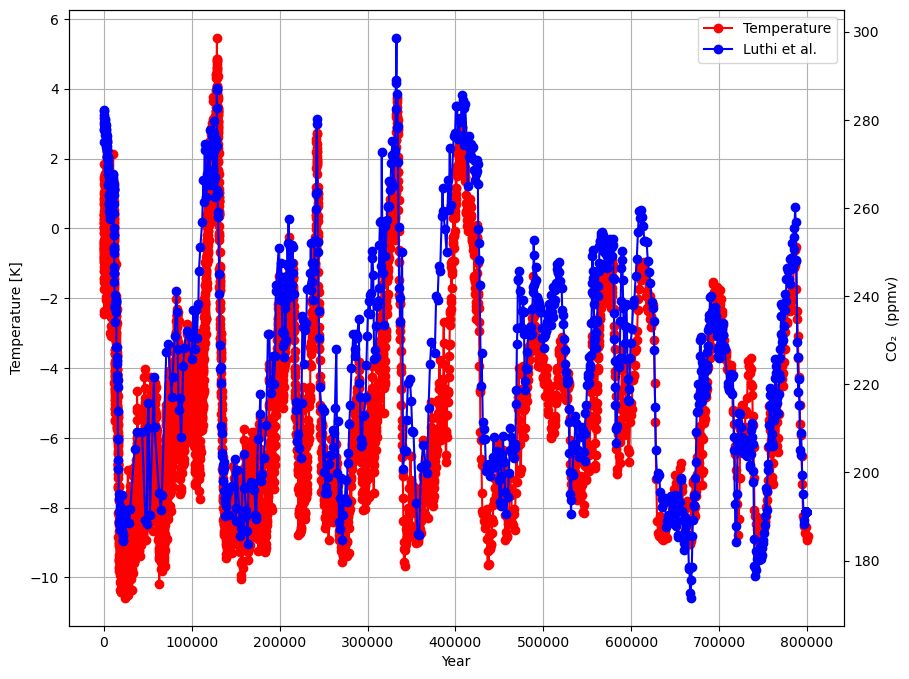

In [29]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [K]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_COM_interpolated['EDC3_gas_a (yr)'], df_COM_interpolated['CO2 (ppmv)'], color='blue', label='Luthi et al.', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper right')
ax2.set_xlabel('Year')
ax2.set_ylabel('CO\u2082  (ppmv)')
ax.grid(True) 